#  Getting Data 
We get and clean the data in this section and create dataframes that we need for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv("data/crime_data_w_population_and_crime_rate.csv", index_col = 0)
income = pd.read_csv("data/all_data_income.csv", index_col = 0, encoding = 'unicode_escape')
abbr = pd.read_csv('data/abbrev.csv',index_col = 0, encoding = 'unicode_escape')

In [3]:
abbr.reset_index(inplace=True)
abbr.columns= ['State', 'trad', 'State_ab']
abbr.drop(['trad'], axis=1, inplace=True)

In [4]:
crime.reset_index()
# dropping rows in crime dataset that have crime rate
crime = crime[crime['crime_rate_per_100000'] != 0]
# dropping columns that I do not use
crime.drop(['index', 'PART', 'EDITION', 'AG_ARRST', 'CPOPARST', 'AG_OFF', 'INDEX', 'COVIND', 'IDNO', 'MODINDX', 'CPOPCRIM', 'FIPS_ST', 'FIPS_CTY'], axis=1, inplace=True)
crime.head()

,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population
county_name,,,,,,,,,,
"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,318416
"Crittenden, AR",1754.914968,8,38,165,662,1482,1753,189,28,49746
"Alexander, IL",1664.700485,1,2,5,119,82,184,12,2,7629
"Kenedy, TX",1456.310680,0,3,1,2,5,4,4,0,412
"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,27083


###### Absolute values in crime can be affected by the population of the city so we will use rates instead

In [5]:
crime['murder_rate'] = crime['MURDER']/crime['population'] *100
crime['rape_rate'] = crime['RAPE']/crime['population'] *100
crime['robbery_rate'] = crime['ROBBERY']/crime['population'] *100
crime['ag_assault_rate'] = crime['AGASSLT']/crime['population'] *100
crime['burglary_rate'] = crime['BURGLRY']/crime['population'] *100
crime['larceny_rate'] = crime['LARCENY']/crime['population'] *100
crime['mv_theft_rate'] = crime['MVTHEFT']/crime['population'] *100
crime['arson_rate'] = crime['ARSON']/crime['population'] *100

In [6]:
income[income['Mean'] == 0].head()

,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
id,,,,,,,,,,,,,,,,,,
1011500,1,Alabama,AL,St. Clair,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0
1021496,1,Alabama,AL,Autauga,Alexandria,Autaugaville,Track,Track,36250,256,89660986,294151,33.718820,-85.952354,0,0,0,0.0
1023736,1,Alabama,AL,Autauga,Bayou La Batre,Autaugaville,Track,Track,36509,251,0,780526158,30.269883,-88.292359,0,0,0,0.0
102806,1,Alabama,AL,Autauga,Mobile,Autaugaville,Track,Track,36608,251,1900631,0,30.695143,-88.182485,0,0,0,0.0
201540,2,Alaska,AK,Ketchikan Gateway Borough,Ketchikan,Loring,CDP,place,99901,907,1434002,200593,55.606676,-131.639976,0,0,0,0.0


There seems to be missing data in our dataset so we will delete those since there is no way of filling those fields

In [7]:
income = income[income['Mean'] != 0]
income['county_name'] = income['County'] + ", " + income['State_ab']
# county_income groups the data in our income dataset based on groups
county_income = income.groupby(by='county_name')[['Mean', 'Median', 'Stdev']].agg(np.mean)
county_income.head()

,Mean,Median,Stdev
county_name,,,
"Abbeville, SC",56916.156627,69921.898795,43929.922892
"Acadia Parish, LA",56382.028384,61472.541485,44753.792576
"Accomack, VA",80684.210818,105963.209431,51600.196949
"Ada, ID",58204.126984,81662.031746,43796.063492
"Adair, IA",64375.627168,78860.364162,46186.887283


In [8]:
county_income.describe()

,Mean,Median,Stdev
count,1661.000000,1661.000000,1661.000000
mean,56540.582520,78568.841084,41547.738179
std,20357.685119,76930.333173,12373.081870
min,10946.000000,6190.000000,1826.000000
25%,43796.500000,35268.000000,34398.000000
50%,53017.500000,47793.000000,40989.000000
75%,65000.000000,78794.600000,48333.000000
max,242857.000000,300000.000000,87319.000000


In [9]:
county_income[county_income['Median'] > 150000]

,Mean,Median,Stdev
county_name,,,
"Aleutians West Census Area, AK",67102.000000,300000.0,41868.0
"Amador, CA",52845.666667,216879.0,33820.0
"Austin, TX",120476.000000,300000.0,64727.0
"Banks, GA",38679.000000,166327.5,22154.5
"Barnes, ND",63411.000000,300000.0,38685.0
...,...,...,...
"Winona, MN",69253.500000,180100.0,49228.5
"Worcester, MD",74971.000000,300000.0,46013.0
"Wyandot, OH",50341.000000,300000.0,15855.0


There are some data points with really unrealistic and inaccurate. Replacing this data with correct information is very expensive so we will have to remove them

In [10]:
county_income = county_income[county_income['Median'] < 150000]

In [11]:
#all_info is all the information that we want to have in our county dataset
all_info = pd.merge(county_income, crime, how='left', on='county_name')
all_info.dropna(inplace=True)
all_info['diff_income'] = all_info['Mean']-all_info['Median']
all_info = all_info[all_info['diff_income'] < 25000]
all_info = all_info[all_info['diff_income'] > 0]
all_info.head()

,Mean,Median,Stdev,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,...,population,murder_rate,rape_rate,robbery_rate,ag_assault_rate,burglary_rate,larceny_rate,mv_theft_rate,arson_rate,diff_income
county_name,,,,,,,,,,,,,,,,,,,,,
"Adams, IA",63647.00,52178.0,48922.0,385.208012,0.0,1.0,0.0,14.0,11.0,36.0,...,3894.0,0.000000,0.025681,0.000000,0.359527,0.282486,0.924499,0.051361,0.000000,11469.00
"Aiken, SC",40744.50,30282.5,36001.5,331.351720,13.0,53.0,108.0,370.0,1618.0,4344.0,...,164176.0,0.007918,0.032282,0.065783,0.225368,0.985528,2.645941,0.347797,0.003655,10462.00
"Albemarle, VA",45772.00,28009.0,52199.0,103.883495,4.0,26.0,18.0,59.0,294.0,1429.0,...,103000.0,0.003883,0.025243,0.017476,0.057282,0.285437,1.387379,0.059223,0.013592,17763.00
"Alfalfa, OK",55944.00,41195.0,46589.0,119.719514,0.0,0.0,0.0,7.0,13.0,30.0,...,5847.0,0.000000,0.000000,0.000000,0.119720,0.222336,0.513084,0.034206,0.000000,14749.00
"Allegany, NY",53906.75,43078.5,40011.0,137.188468,2.0,9.0,3.0,52.0,217.0,585.0,...,48109.0,0.004157,0.018708,0.006236,0.108088,0.451059,1.215989,0.041572,0.004157,10828.25


In [12]:
all_info.describe()

,Mean,Median,Stdev,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,...,population,murder_rate,rape_rate,robbery_rate,ag_assault_rate,burglary_rate,larceny_rate,mv_theft_rate,arson_rate,diff_income
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1.161000e+03,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,55091.488925,44771.377059,42604.985081,254.731631,6.167959,37.213609,149.509905,331.243755,950.913867,2695.024978,...,1.438793e+05,0.003176,0.026126,0.037868,0.187466,0.566907,1.495092,0.117984,0.014070,10320.111866
std,17595.201735,17477.253692,10652.444442,194.768242,26.717556,102.883584,735.112160,1112.587185,2780.363272,7529.066981,...,4.260459e+05,0.005127,0.024691,0.051272,0.152758,0.358554,0.797556,0.105768,0.016424,4193.397752
min,10946.000000,6190.000000,8591.000000,7.413311,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,8.320000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.008361,0.000000,0.000000,39.500000
25%,43615.000000,33235.000000,35626.666667,115.649720,0.000000,3.000000,1.000000,16.000000,61.000000,156.000000,...,1.651300e+04,0.000000,0.011590,0.005530,0.077282,0.304196,0.924499,0.052375,0.003989,7593.000000
50%,51944.000000,41851.500000,41422.000000,206.391478,1.000000,9.000000,7.000000,55.000000,210.000000,561.000000,...,3.788600e+04,0.001256,0.021473,0.018708,0.150295,0.493355,1.451987,0.092381,0.010697,10307.000000
75%,62806.000000,52819.000000,48342.000000,339.590408,3.000000,29.000000,44.000000,209.000000,685.000000,1971.000000,...,1.036170e+05,0.004544,0.034921,0.050129,0.254250,0.754299,1.971640,0.147044,0.019363,12809.000000
max,136797.000000,129656.000000,80233.000000,1315.003752,600.000000,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,...,1.001707e+07,0.045461,0.359281,0.373830,1.074065,2.499597,4.603050,0.859079,0.238307,24394.000000


In [13]:
# dropping the columns that we do not need (all the absolute values of crime)
all_info.drop(['MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON'], axis=1, inplace=True)

This is what we have in our county dataset

In [14]:
all_info.columns

Index(['Mean', 'Median', 'Stdev', 'crime_rate_per_100000', 'population',
       'murder_rate', 'rape_rate', 'robbery_rate', 'ag_assault_rate',
       'burglary_rate', 'larceny_rate', 'mv_theft_rate', 'arson_rate',
       'diff_income'],
      dtype='object')

#### Creating the state dataframe

In [15]:
crime.reset_index(inplace=True)
crime['State_ab'] = crime['county_name'].str[-2:]

In [16]:
state_crime = crime.groupby(by='State_ab')[['crime_rate_per_100000', 'murder_rate', 'rape_rate', 'robbery_rate', 'ag_assault_rate', 'burglary_rate', 'larceny_rate', 'mv_theft_rate', 'arson_rate']].agg(np.mean)
state_crime['population'] = crime.groupby(by='State_ab')['population'].agg(sum)
state_crime.head()

,crime_rate_per_100000,murder_rate,rape_rate,robbery_rate,ag_assault_rate,burglary_rate,larceny_rate,mv_theft_rate,arson_rate,population
State_ab,,,,,,,,,,
AK,391.434236,0.002475,0.072366,0.037238,0.279355,0.234789,1.417143,0.177264,0.010962,692126
AL,391.488807,0.005863,0.024661,0.054941,0.305675,0.813579,1.765388,0.164834,0.027944,4823702
AR,339.274386,0.004845,0.035161,0.042093,0.256888,0.910580,1.707767,0.123159,0.018872,2950147
AZ,352.629443,0.003837,0.017064,0.037580,0.294100,0.564095,1.532924,0.152265,0.020115,6626624
CA,416.077953,0.004542,0.031480,0.087166,0.292890,0.742646,1.566287,0.328504,0.019698,38332521


In [17]:
# Getting the data required for the dataframe
state_age = pd.read_csv("data/state_age.csv", encoding='unicode_escape')
state_income = pd.read_excel("data/income_state.xlsx", index_col=0)
state_poverty = pd.read_csv("data/state_poverty.csv")

In [18]:
# Cleaning up the column names
state_age.columns= ['State', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale']
state_poverty.columns = ['State', 'PovertyRate', 'Poverty']

In [19]:
# turning the poverty rate into a percentage value
state_poverty['PovertyRate'] = state_poverty['PovertyRate']*100

In [20]:
# creating the value "diff_income" to have the differnece between the mean and median household income
state_income['diff_income'] = state_income['Mean_Household']- state_income['Median_Household']

In [21]:
state_data = pd.merge(state_age, state_income, on='State')
state_data = pd.merge(state_data, state_poverty, on='State')
state_data = pd.merge(state_data, abbr, how='left', on='State')
state_data.head()

,State,MedianAge,MedianAgeMale,MedianAgeFemale,Median_Household,Median_Family,Per_Capita,Mean_Household,diff_income,PovertyRate,Poverty,State_ab
0,Maine,45,43,46,58924,76316,34078,76227,17303,11.26,153131,ME
1,West Virginia,43,41,44,48850,60920,27446,63680,14830,17.66,310044,WV
2,Vermont,43,41,44,63001,83458,35702,81233,18232,10.54,65652,VT
3,New Hampshire,43,42,44,77933,97112,41241,99165,21232,7.16,98682,NH
4,Florida,42,41,44,59227,71348,32887,80286,21059,12.94,2870487,FL


In [22]:
state_info = pd.merge(state_data, state_crime, how='left', on='State_ab')
state_info.dropna(inplace=True)
state_info.head()

,State,MedianAge,MedianAgeMale,MedianAgeFemale,Median_Household,Median_Family,Per_Capita,Mean_Household,diff_income,PovertyRate,...,crime_rate_per_100000,murder_rate,rape_rate,robbery_rate,ag_assault_rate,burglary_rate,larceny_rate,mv_theft_rate,arson_rate,population
0,Maine,45,43,46,58924,76316,34078,76227,17303,11.26,...,115.957182,0.001745,0.026449,0.021867,0.065896,0.573368,1.666201,0.068892,0.016183,1328302
1,West Virginia,43,41,44,48850,60920,27446,63680,14830,17.66,...,252.774190,0.003369,0.017048,0.022699,0.209699,0.532878,1.045552,0.095973,0.013930,1854304
2,Vermont,43,41,44,63001,83458,35702,81233,18232,10.54,...,128.426140,0.001219,0.018818,0.014550,0.093840,0.637124,1.461787,0.081616,0.011203,620419
3,New Hampshire,43,42,44,77933,97112,41241,99165,21232,7.16,...,160.155124,0.001534,0.032095,0.024801,0.101724,0.384774,1.693063,0.065053,0.020706,1323459
4,Florida,42,41,44,59227,71348,32887,80286,21059,12.94,...,412.938703,0.003725,0.027844,0.063221,0.318149,0.720909,1.646556,0.113255,0.008271,19552860


In [23]:
state_info.describe()

,MedianAge,MedianAgeMale,MedianAgeFemale,Median_Household,Median_Family,Per_Capita,Mean_Household,diff_income,PovertyRate,Poverty,crime_rate_per_100000,murder_rate,rape_rate,robbery_rate,ag_assault_rate,burglary_rate,larceny_rate,mv_theft_rate,arson_rate,population
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,38.620000,37.180000,39.800000,64976.22000,80798.440000,34655.920000,84854.420000,19878.200000,12.442000,8.480741e+05,255.914218,0.003012,0.026351,0.038547,0.187901,0.538856,1.474809,0.119602,0.014569,6.288363e+06
std,2.380962,2.191728,2.474358,10604.01997,12347.389886,5000.589418,13499.417932,4005.341225,2.770258,9.949289e+05,118.546592,0.001530,0.010805,0.028097,0.096912,0.205812,0.366490,0.055157,0.006261,7.068585e+06
min,31.000000,30.000000,32.000000,45792.00000,58503.000000,25301.000000,62835.000000,12811.000000,7.160000,6.225700e+04,98.814736,0.000968,0.012105,0.004728,0.049235,0.202905,0.804086,0.057404,0.006201,5.826580e+05
25%,37.250000,36.000000,38.250000,57457.50000,72527.250000,31601.500000,75283.750000,17295.500000,10.540000,2.405762e+05,160.166846,0.001785,0.019347,0.019646,0.108994,0.384776,1.242379,0.077689,0.009420,1.777189e+06
50%,38.500000,37.000000,40.000000,63115.00000,78579.000000,33189.500000,81006.000000,18665.000000,12.135000,5.758295e+05,233.274785,0.002684,0.023212,0.033398,0.153107,0.532260,1.497983,0.111599,0.014527,4.501209e+06
75%,40.000000,38.000000,41.000000,73971.75000,89449.500000,37391.000000,93542.500000,21019.000000,13.825000,8.708705e+05,349.290678,0.003813,0.030056,0.053419,0.255084,0.652550,1.684236,0.142505,0.016775,6.901760e+06
max,45.000000,43.000000,46.000000,86738.00000,108348.000000,46241.000000,114691.000000,34198.000000,19.780000,5.149742e+06,581.137384,0.007972,0.072366,0.129867,0.456631,1.079724,2.487235,0.328504,0.041188,3.833252e+07


This is what we have for our state dataframe

In [24]:
state_info.columns

Index(['State', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'Median_Household', 'Median_Family', 'Per_Capita', 'Mean_Household',
       'diff_income', 'PovertyRate', 'Poverty', 'State_ab',
       'crime_rate_per_100000', 'murder_rate', 'rape_rate', 'robbery_rate',
       'ag_assault_rate', 'burglary_rate', 'larceny_rate', 'mv_theft_rate',
       'arson_rate', 'population'],
      dtype='object')

# Visualizing the Data

## Heatmaps

In [25]:
import seaborn as sns

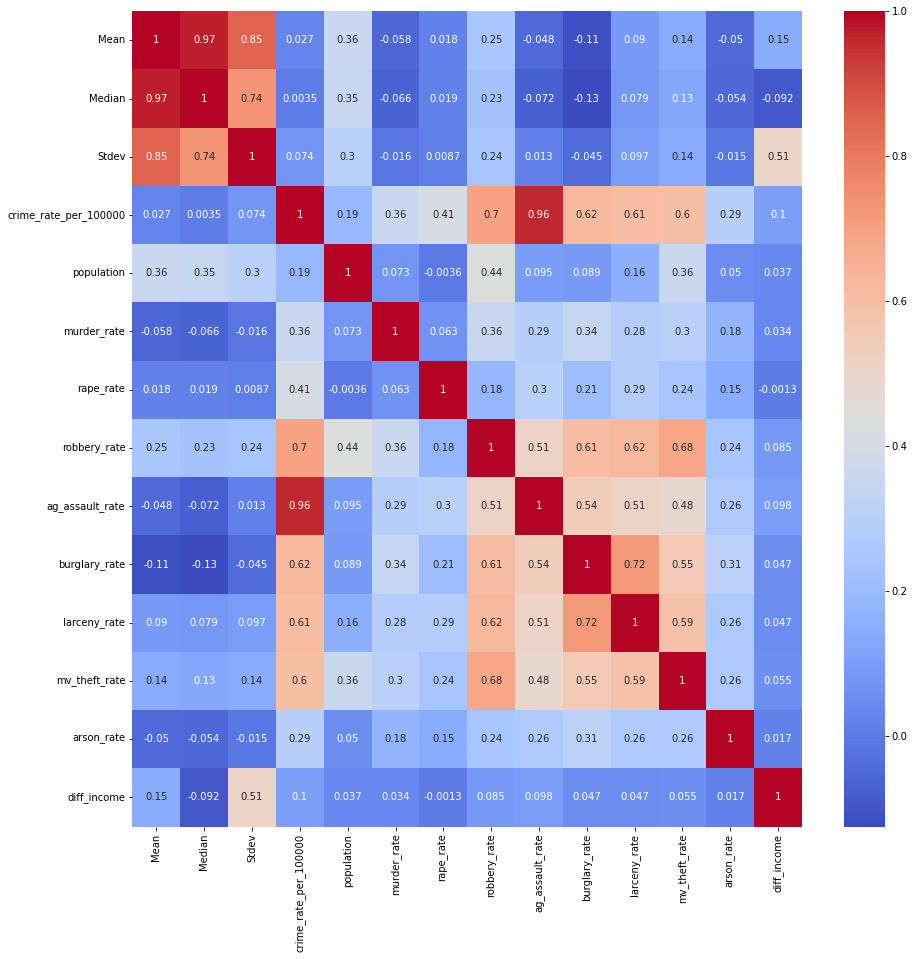

In [26]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(all_info.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()
fig.savefig('ScreenShots/county_heatmap.jpg', bbox_inches='tight', dpi=150)

Interesting pairs = (population, mv_theft_rate) , (population, roberry_rate)

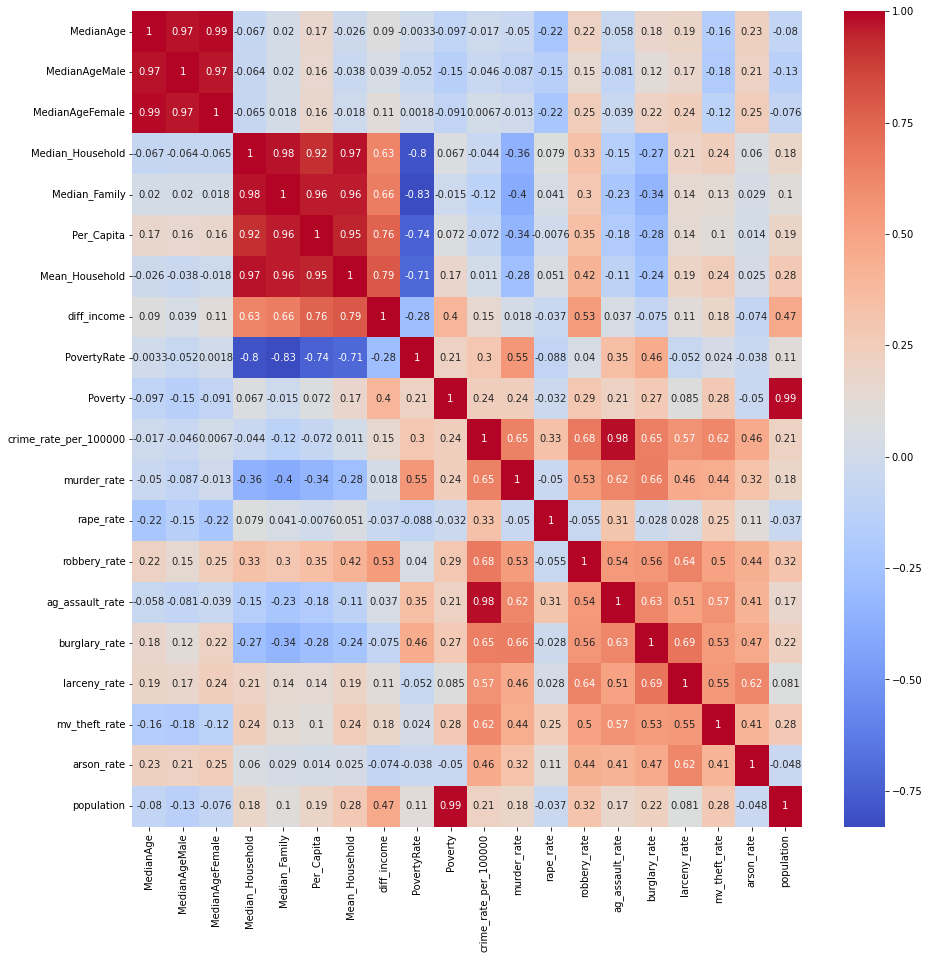

In [27]:
fig_state = plt.figure(figsize=(15, 15))
sns.heatmap(state_info.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
# plt.show()
fig_state.savefig('ScreenShots/state_heatmap.jpg', bbox_inches='tight', dpi=150)

Interesting pairs = (MedianAgeFemale, arson_rate), (PovertyRate, burglary_rate), (PovertyRate, murder_rate)

## Pairplots

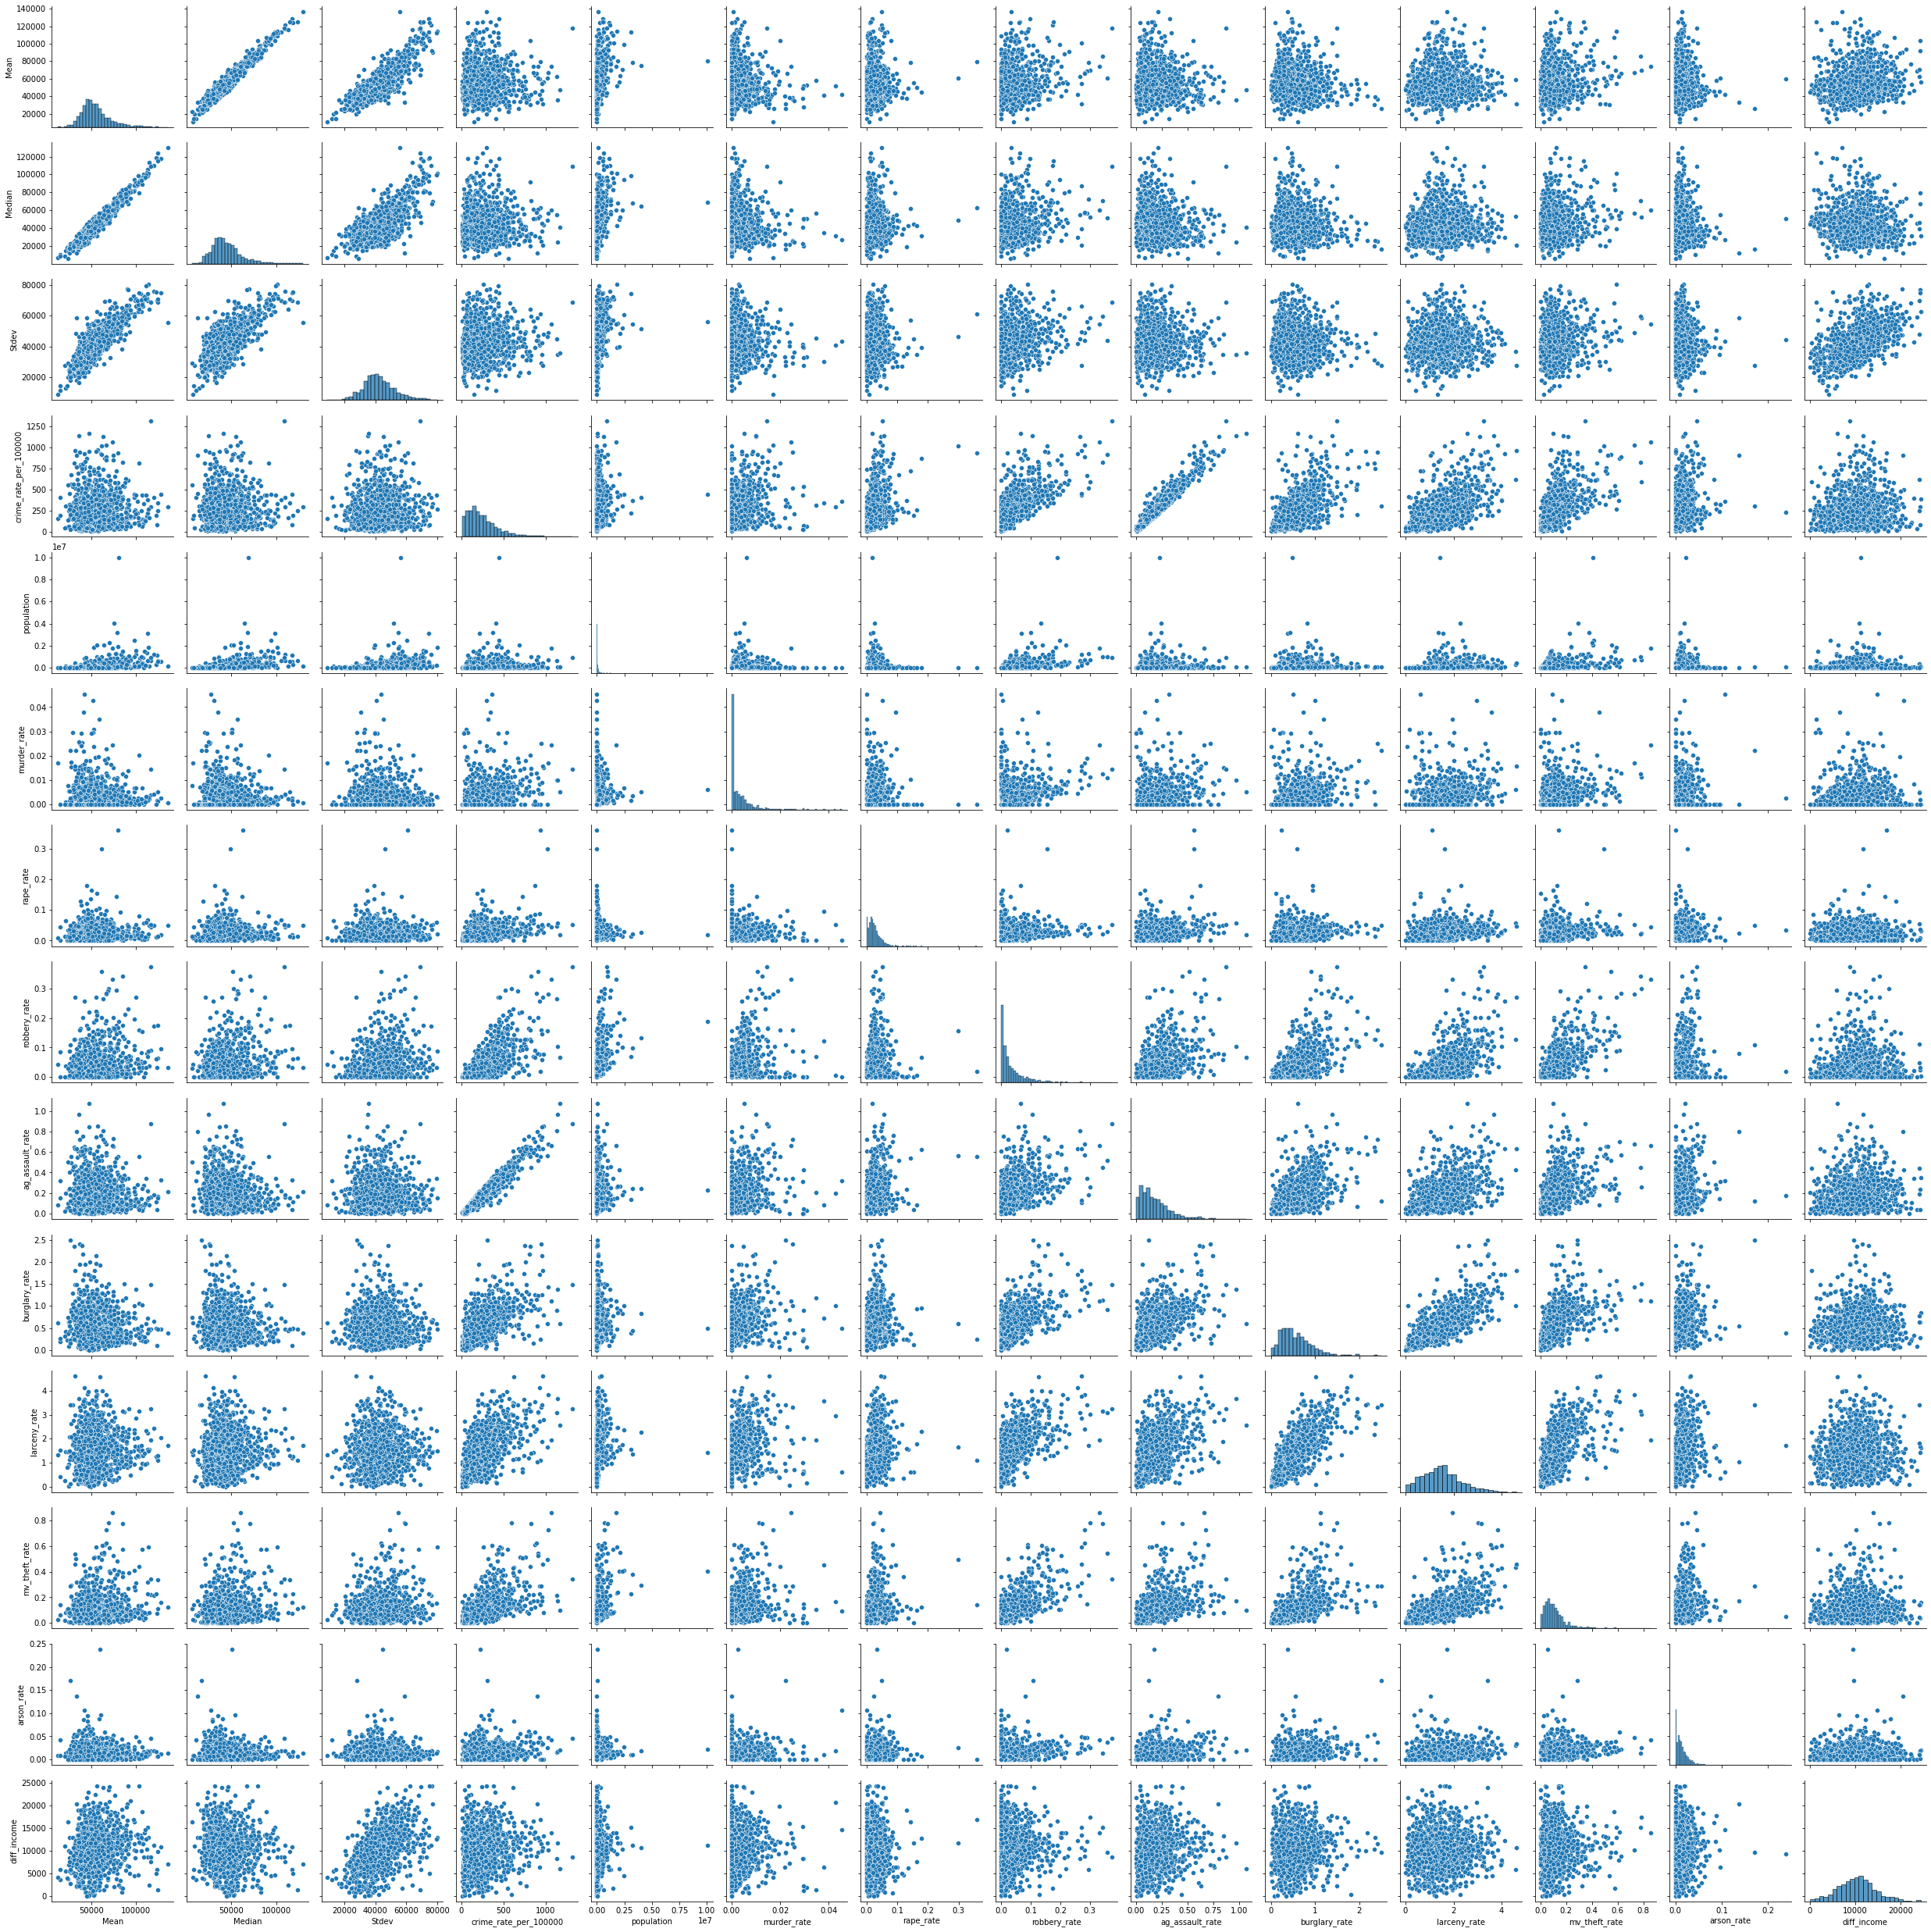

In [28]:
sns.pairplot(all_info)
plt.show()

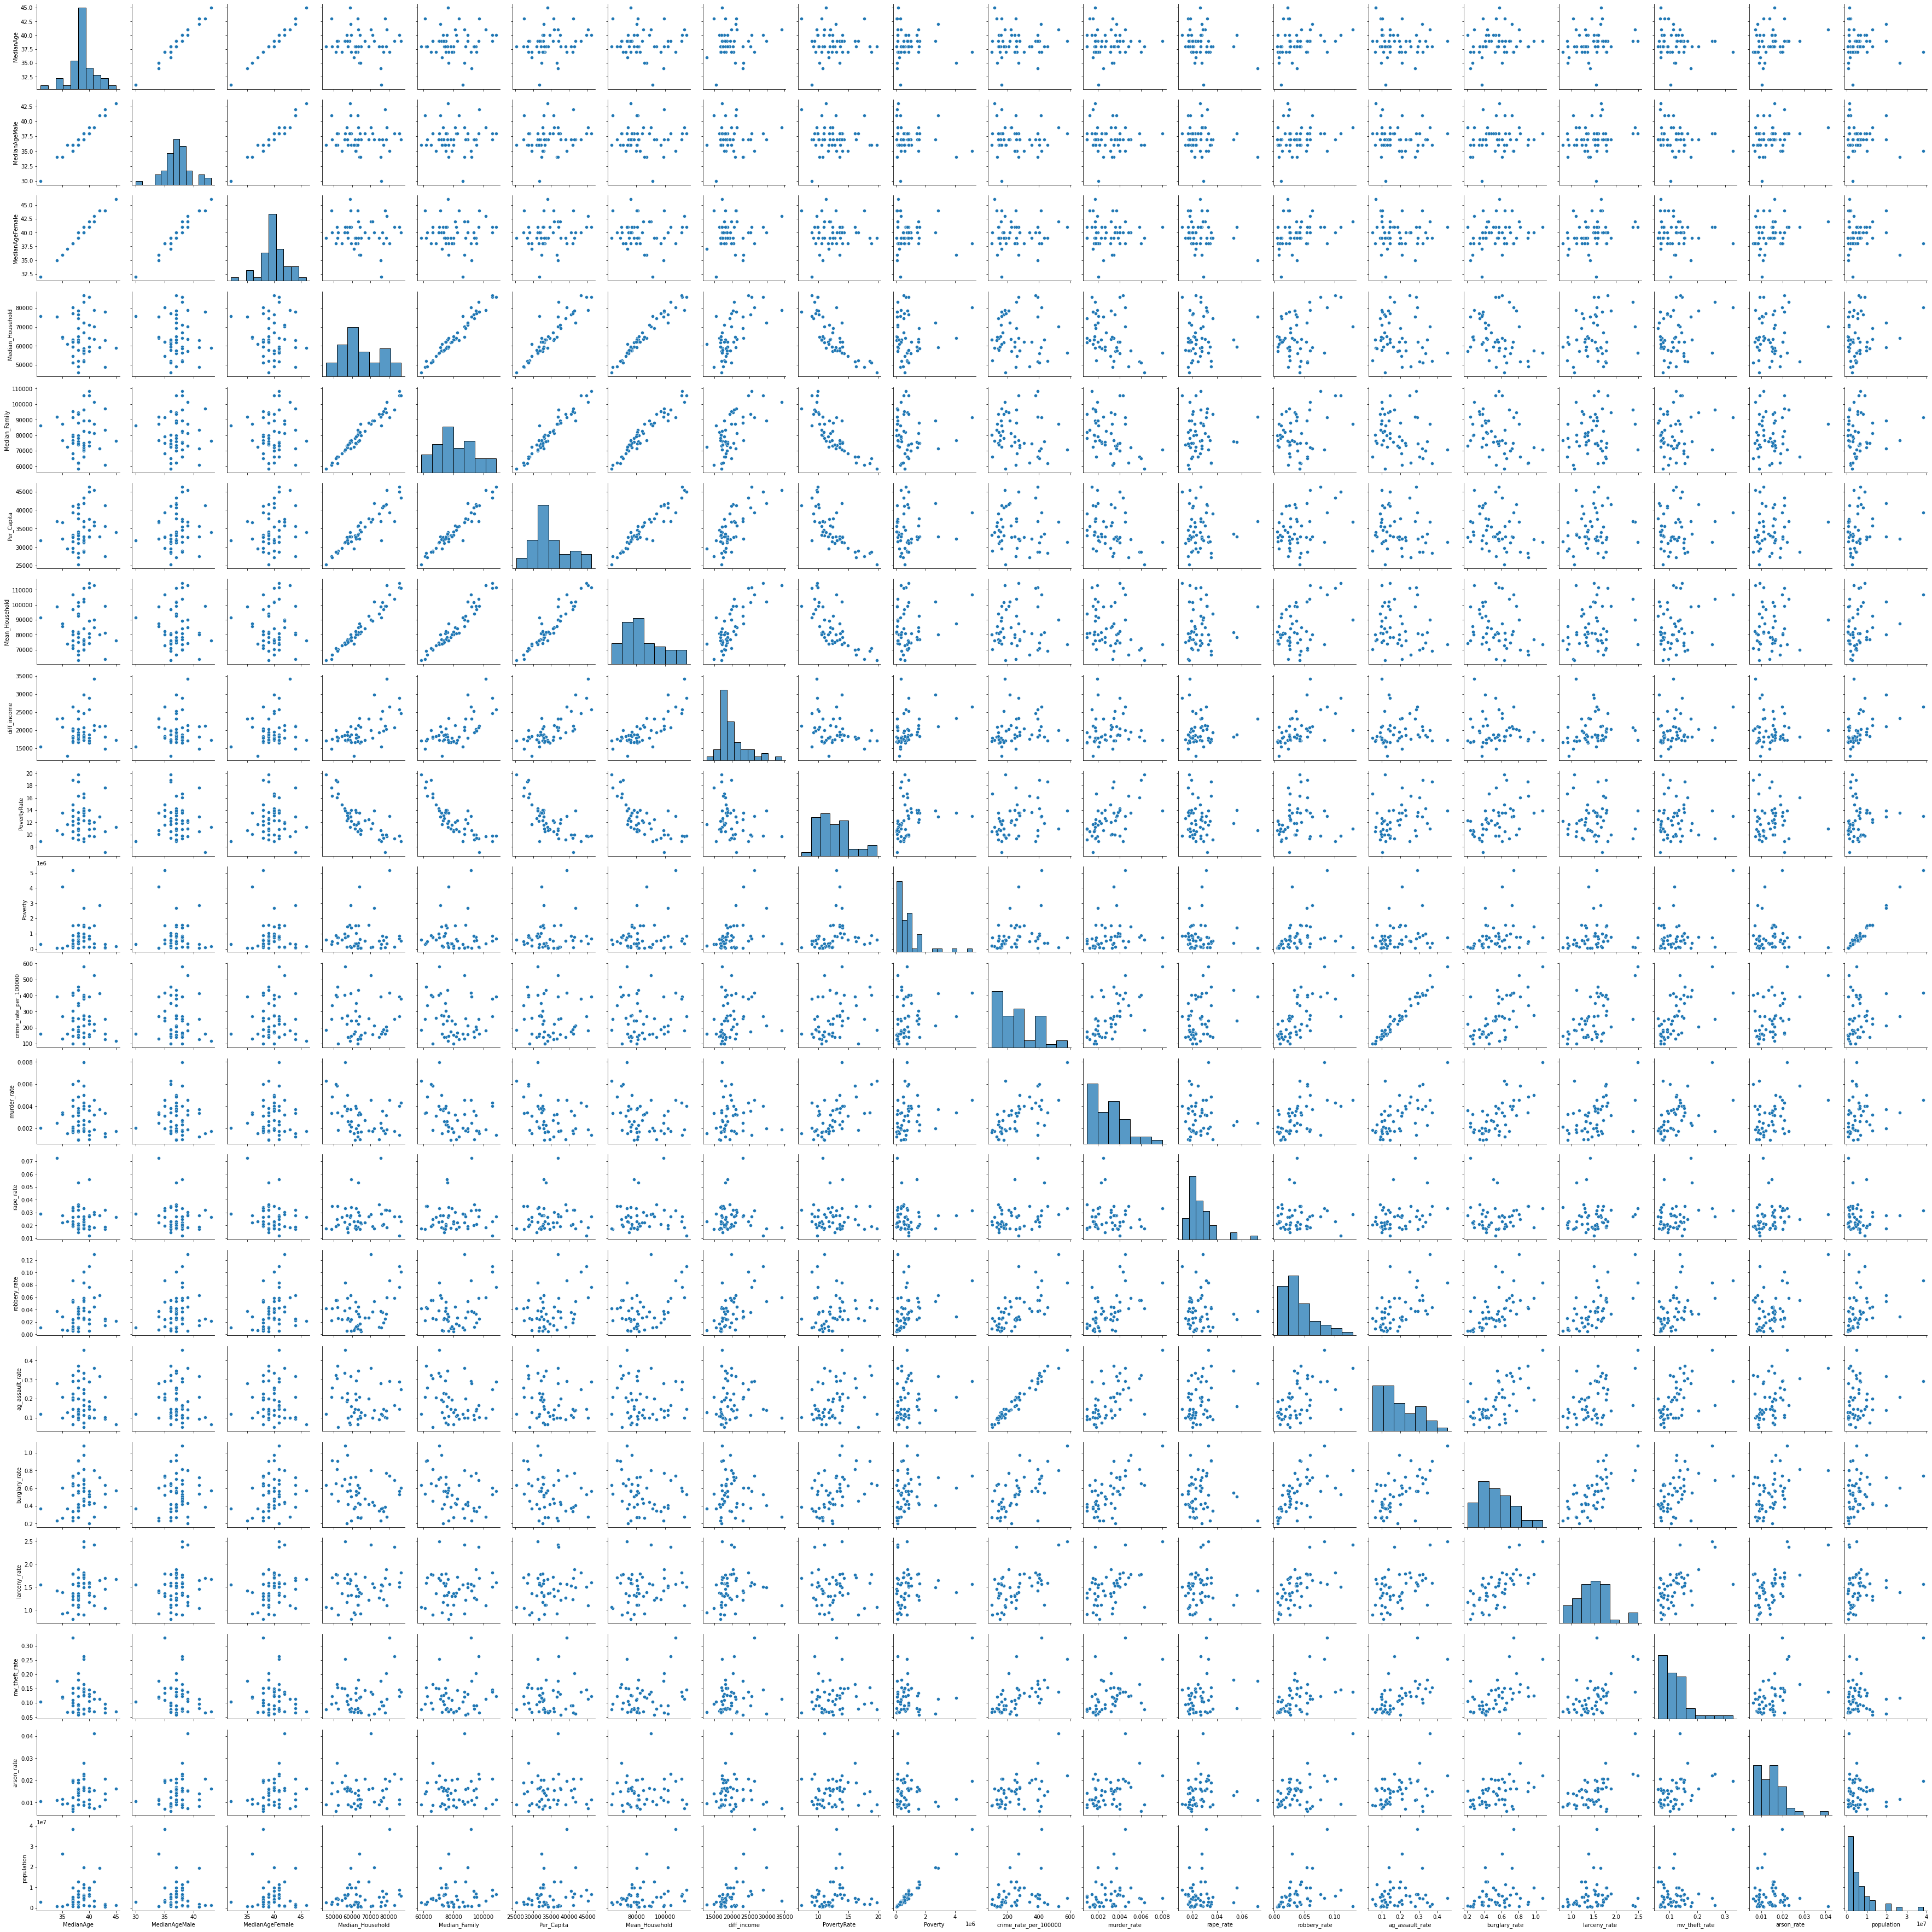

In [29]:
sns.pairplot(state_info)
plt.show()

Seeing this pairplotting, we cannot tell much about them. We will have to look at the heatmaps and pick and choose the data we want to look into.

### state_info: Median Female Age vs Arson rate
The correlation is unusual so we will plot the data

<AxesSubplot:xlabel='MedianAgeFemale', ylabel='arson_rate'>

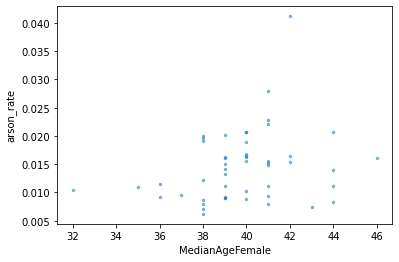

In [30]:
state_info.plot.scatter(x='MedianAgeFemale', y='arson_rate', s=6, alpha=0.5)

With some outside search (94% of arsonists are male) we will choose to leave this observation for now.

### state_info: Poverty rate vs burglary rate

<AxesSubplot:xlabel='PovertyRate', ylabel='burglary_rate'>

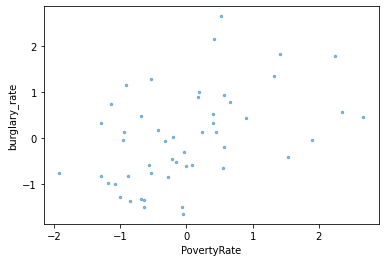

In [31]:
from scipy import stats
import statsmodels.formula.api as smf
# standardizing the data 
state_info['PovertyRate'] = stats.zscore(state_info['PovertyRate'])
state_info['burglary_rate'] = stats.zscore(state_info['burglary_rate'])
state_info.plot.scatter(x='PovertyRate', y='burglary_rate', s=6, alpha=0.5)

This is what our data looks like. The data is not very strongly correlated in any specific way.

In [32]:
logmodel = smf.ols("burglary_rate ~ PovertyRate", state_info).fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          burglary_rate   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     12.57
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           0.000886
Time:                        21:19:37   Log-Likelihood:                -65.131
No. Observations:                  50   AIC:                             134.3
Df Residuals:                      48   BIC:                             138.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.18e-16      0.128   9.18e-16      1.000      -0.258       0.258
PovertyRate     0.4556      0.128      3.546      0.001       0.197       0.714
==============================================================================
Omnibus:                        2.863   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.545
Skew:                           0.548   Prob(JB):                        0.280
Kurtosis:                       2.852   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 score is 0.21 which is quite small

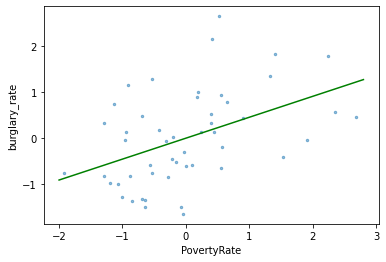

In [33]:
state_info.plot.scatter(x='PovertyRate', y='burglary_rate', s=6, alpha=0.5)
plt.plot(np.arange(-2,3, 0.2), logmodel.predict(pd.DataFrame({'PovertyRate': np.arange(-2, 3, 0.2)})), color = 'green')

The fitted line alongside the data. As can be seen, the data is not strongly correlated so we cannot find a perfect line.

In [34]:
reg = stats.linregress(state_info['PovertyRate'], state_info['burglary_rate'])
print("Slope = ",reg.slope, "\nIntercept = ", reg.intercept)
print("Pvalue = ", reg.pvalue)
residuals = all_info['mv_theft_rate'] - (reg.slope*all_info['population'] + reg.intercept)
print((residuals**2).sum())

0.45556949210412623 -1.3367976442688247e-16
0.0008858167379710523
39.62282189319942


The pvalue is very small so we can reject the null hypothesis

### state_info: Poverty rate vs murder rate

<AxesSubplot:xlabel='PovertyRate', ylabel='murder_rate'>

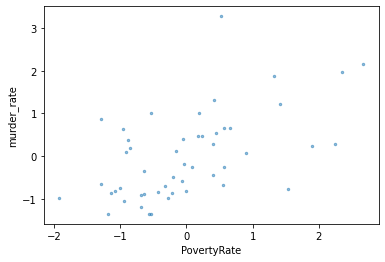

In [35]:
# standardizing the data 
state_info['PovertyRate'] = stats.zscore(state_info['PovertyRate'])
state_info['murder_rate'] = stats.zscore(state_info['murder_rate'])
state_info.plot.scatter(x='PovertyRate', y='murder_rate', s=6, alpha=0.5)

In [36]:
logmodel = smf.ols("murder_rate ~ PovertyRate", state_info).fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            murder_rate   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     21.18
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           3.08e-05
Time:                        21:19:37   Log-Likelihood:                -61.809
No. Observations:                  50   AIC:                             127.6
Df Residuals:                      48   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.082e-16      0.120   1.73e-15      1.000      -0.242       0.242
PovertyRate     0.5533      0.120      4.602      0.000       0.312       0.795
==============================================================================
Omnibus:                       11.795   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.559
Skew:                           0.945   Prob(JB):                      0.00187
Kurtosis:                       4.566   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 score is 0.31 which is small this means this model may not be perfect

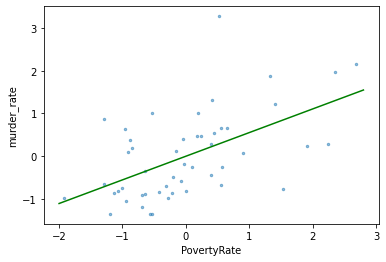

In [37]:
state_info.plot.scatter(x='PovertyRate', y='murder_rate', s=6, alpha=0.5)
plt.plot(np.arange(-2,3, 0.2), logmodel.predict(pd.DataFrame({'PovertyRate': np.arange(-2, 3, 0.2)})), color = 'green')

In [38]:
reg = stats.linregress(state_info['PovertyRate'], state_info['burglary_rate'])
print("Slope = ",reg.slope, "\nIntercept = ", reg.intercept)
print("Pvalue = ", reg.pvalue)
residuals = all_info['mv_theft_rate'] - (reg.slope*all_info['population'] + reg.intercept)
print((residuals**2).sum())

Slope =  0.45556949210412623 
Intercept =  1.536053995811659e-16
Pvalue =  0.0008858167379710523
48687948279721.49


The pvalue is very small so we can reject the null hypothesis

In [39]:
reg = stats.linregress(all_info['Median'], all_info['mv_theft_rate'])
print("Slope = ",reg.slope, "\nIntercept = ", reg.intercept)
print("Pvalue = ", reg.pvalue)
residuals = all_info['mv_theft_rate'] - (reg.slope*all_info['population'] + reg.intercept)
print((residuals**2).sum())

Slope =  7.804734732912961e-07 
Intercept =  0.08304126728576175
Pvalue =  1.0431098415196473e-05
118.65085194260074


The pvalue is very small so we can reject the null hypothesis

# Modeling 

In [40]:
import statsmodels.api as sm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### all_info: population vs mv_theft_rate

<AxesSubplot:xlabel='population', ylabel='mv_theft_rate'>

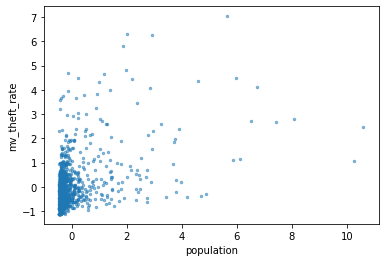

In [41]:
all_info = all_info[all_info['population'] < 4000000]
# Standardizing the data
all_info['population'] = stats.zscore(all_info['population'])
all_info['mv_theft_rate'] = stats.zscore(all_info['mv_theft_rate'])
all_info.plot.scatter(x='population', y='mv_theft_rate', s=6, alpha=0.5)

#### Linear Regression 

In [42]:
reg = stats.linregress(all_info['population'], all_info['mv_theft_rate'])
print("Slope = ",reg.slope, "\nIntercept = ", reg.intercept)
print("Pvalue = ", reg.pvalue)
residuals = all_info['mv_theft_rate'] - (reg.slope*all_info['population'] + reg.intercept)
print((residuals**2).sum())

Slope =  0.4337383830840801 
Intercept =  9.484063923802415e-17
Pvalue =  2.3420713100668723e-54
940.9585064309053


The pvalue is again very small, so we can rejevt the null hypothesis of the slope of this line being zero.

#### Test and Train data

In [43]:
X= all_info['population'].values
y = all_info['robbery_rate'].values*100
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
X_train= X_train.reshape(-1, 1)
X_valid = X_valid.reshape(-1, 1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_valid.shape)

X_train shape: (869, 1)
X_test shape: (290, 1)


#### K-Nearest Neighborhors 

In [44]:
model = KNeighborsRegressor(5)
model.fit(X_train, y_train)
print("model score for training data= " , model.score(X_train, y_train))
print("model score for test data= ",model.score(X_valid, y_valid))
y_predicted = model.predict(X_valid)
print ("MSE = ",format(np.power(y_valid-model.predict(X_valid),2).mean()))
print ("r2 score = ", metrics.r2_score(y_valid, y_predicted))
print ("mean squared error = ", metrics.mean_squared_error(y_valid, y_predicted))

model score for training data=  0.5404903824196945
model score for test data=  -0.06456731726184173
MSE =  15.33828204856169
r2 score =  -0.06456731726184173
mean squared error =  15.33828204856169


r2 score is 0.43 which is not a great number. Next, we will look into another algorithm

#### Random Forest

In [45]:
model = RandomForestRegressor(30, max_depth=4)
model.fit(X_train, y_train)
y_predicted = model.predict(X_valid)
print("model score for training data= " , model.score(X_train, y_train))
print("model score for test data= ",model.score(X_valid, y_valid))
y_predicted = model.predict(X_valid)
print ("MSE = ",format(np.power(y_valid-model.predict(X_valid),2).mean()))
print ("r2 score = ", metrics.r2_score(y_valid, y_predicted))
print ("mean squared error = ", metrics.mean_squared_error(y_valid, y_predicted))

model score for training data=  0.5628621966632773
model score for test data=  0.17003138266862639
MSE =  11.958184830271492
r2 score =  0.17003138266862639
mean squared error =  11.958184830271492


r2 score is again 0.44 which is not a great number.

As a result, we cannot say that any of our models are very strong. There is definitely room for improvemnt. 
For further steps, I would like to look more into other variables that can affect crime in cities and whether or not there are other machine learning algorithms that can get a better score.